# Pendulo Duplo

### Vetores

In [5]:
from numpy.linalg import inv
from numpy import cos, array, sin, arange

# functions:
def G(y,t): 
	a1d, a2d = y[0], y[1]
	a1, a2 = y[2], y[3]

	m11, m12 = (m1 + m2) * l1, m2 * l2 * cos(a1 - a2)
	m21, m22 = l1 * cos(a1 - a2), l2
	m = array([[m11, m12],[m21, m22]])

	f1 = -m2 * l2 * a2d * a2d * sin(a1 - a2) - (m1 + m2) * g * sin(a1)
	f2 = l1 * a1d * a1d * sin(a1 - a2) - g * sin(a2)
	f = array([f1, f2])
	accel = inv(m).dot(f)
	return array([accel[0], accel[1], a1d, a2d])

def RK4_step(y, t, dt):
	k1 = G(y, t)
	k2 = G(y + 0.5 * k1 * dt, t + 0.5 * dt)
	k3 = G(y + 0.5 * k2 * dt, t + 0.5 * dt)
	k4 = G(y + k3 * dt, t + dt)
	return dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Parameters:
m1, m2 = 2.0, 1.0
l1, l2 = 1.0, 2.0
g = 9.8

delta_t = 0.01
time = arange(0.0, 10.0, delta_t)

y = array([0, 0, 0, 1.0])   # [velocity, displacement]
Y1 = []
Y2 = []

# time-stepping solution
for t in time:
	y = y + RK4_step(y, t, delta_t) 

	Y1.append(y[2])
	Y2.append(y[3])

# Results:
print('Peso 1:', Y1)
print('Peso 2:', Y2)

Peso 1: [8.227413210707583e-05, 0.00032921397953173434, 0.0007411714346367295, 0.0013187314430765033, 0.002062709675130895, 0.0029741492328057614, 0.004054316359289691, 0.00530469510688523, 0.006726980908361396, 0.008323072984639298, 0.010095065508659518, 0.012045237431023256, 0.014176040857385445, 0.016490087850449732, 0.01899013551062766, 0.02167906916885368, 0.024559883502604032, 0.0276356613618109, 0.030909550065125614, 0.0343847348989982, 0.038064409522573846, 0.04195174295091101, 0.04604984275819098, 0.05036171411241296, 0.05489021422494236, 0.05963800177408034, 0.06460748084402511, 0.06980073891239279, 0.07521947842488885, 0.08086494151975802, 0.08673782751332035, 0.09283820283833916, 0.09916540324731199, 0.10571792826203125, 0.11249332807840882, 0.11948808343091841, 0.12669747929226424, 0.1341154737367083, 0.1417345638312187, 0.14954565103200987, 0.1575379092407627, 0.1656986593887117, 0.17401325512765473, 0.1824649848591357, 0.1910349958557927, 0.19970224653910534, 0.208443492

### Gráfico


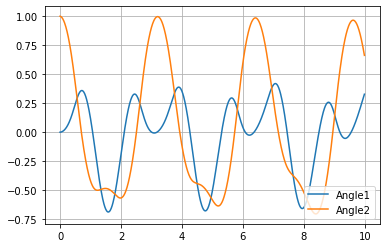

In [6]:
from matplotlib import pyplot as plt

# plot the result
plt.plot(time, Y1)
plt.plot(time, Y2)
plt.grid(True)
plt.legend(['Angle1', 'Angle2'], loc = 'lower right')
plt.show()


### Animação
